In [1]:
import multipagetiff as mtif
from matplotlib import pyplot as plt
import numpy as np
from skimage import morphology
from mpl_toolkits.mplot3d import Axes3D


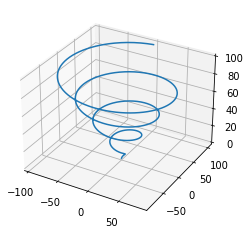

In [2]:
fig = plt.figure()
ax = fig.gca(projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
z = np.linspace(0, 100, 1000)
r = z
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')

plt.show()


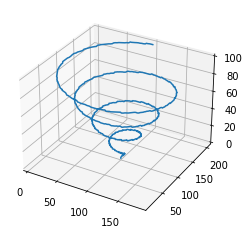

In [3]:
points = np.round(np.array(list(zip(x,y,z)))).astype(int) + (100,100,0)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(*points.T, label='parametric curve')

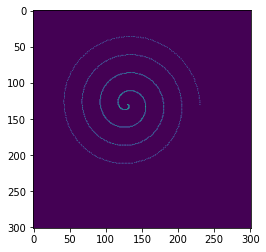

In [14]:
a = np.zeros((101,301,301))

for point in points:
    x,y,z=point
    a[z,x+30,y+30] = 1

plt.imshow(a.sum(axis=0))

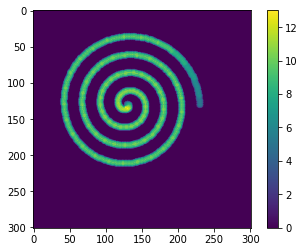

In [15]:
se = morphology.selem.ball(5)
b = morphology.dilation(a,se)
plt.imshow(b.sum(axis=0))
plt.colorbar()

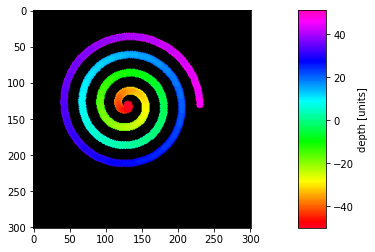

In [16]:
s = mtif.Stack(b)
mtif.plot_flatten(s)

In [17]:
mtif.write_stack(s,"spiral.tif")